In [1]:
!pip install tslearn

     |████████████████████████████████| 749 kB 1.8 MB/s eta 0:00:01


In [2]:
%matplotlib inline


SVM and GAK
===========

This example illustrates the use of the global alignment kernel (GAK) for
support vector classification.

This metric is defined in the `tslearn.metrics <mod-metrics>` module and
explained in details in [1].

In this example, a `TimeSeriesSVC` model that uses GAK as kernel is fit and the
support vectors for each class are reported.


[1] M. Cuturi, "Fast global alignment kernels," ICML 2011.


Correct classification rate: 1.0


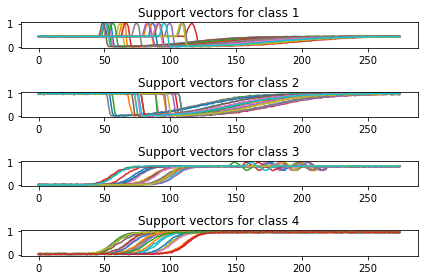

In [3]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.svm import TimeSeriesSVC

numpy.random.seed(0)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = TimeSeriesScalerMinMax().fit_transform(X_train)
X_test = TimeSeriesScalerMinMax().fit_transform(X_test)

clf = TimeSeriesSVC(kernel="gak",
                    gamma=.1)
clf.fit(X_train, y_train)
print("Correct classification rate:", clf.score(X_test, y_test))

n_classes = len(set(y_train))

plt.figure()
support_vectors = clf.support_vectors_time_series_(X_train)
for i, cl in enumerate(set(y_train)):
    plt.subplot(n_classes, 1, i + 1)
    plt.title("Support vectors for class %d" % (cl))
    for ts in support_vectors[i]:
        plt.plot(ts.ravel())

plt.tight_layout()
plt.show()